# Support Vector Classifier 

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

#### Lets create synthetic data points

In [55]:

from sklearn.datasets import make_classification

In [56]:
X,y=make_classification(n_samples=5000,n_features=2,n_classes=2,
                        n_clusters_per_class=2,n_redundant=0)

In [57]:
X,y

(array([[ 0.63260493,  0.08352008],
        [ 0.35513307,  0.26307695],
        [-0.50235743,  1.50634574],
        ...,
        [-0.74605697,  2.56532669],
        [ 1.12398702, -0.31262771],
        [ 1.8857189 ,  0.7834797 ]]),
 array([1, 0, 1, ..., 1, 0, 0]))

In [58]:
pd.DataFrame(X)[0]

0       0.632605
1       0.355133
2      -0.502357
3       1.515175
4       1.091483
          ...   
4995    0.736741
4996   -0.622205
4997   -0.746057
4998    1.123987
4999    1.885719
Name: 0, Length: 5000, dtype: float64

### Visualizing two features of X (X[0] and X[1]) with hue y

<Axes: xlabel='0', ylabel='1'>

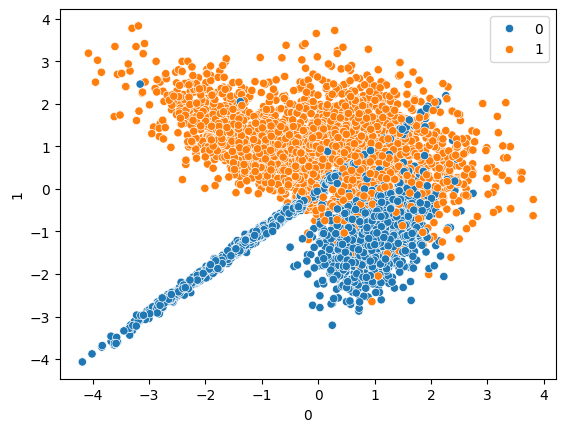

In [59]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

### Train-Test Split

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [61]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [62]:
svc.coef_

array([[-0.05022503,  1.68804736]])

### Prediction

In [63]:

y_pred=svc.predict(X_test)

In [64]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [65]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       624
           1       0.91      0.89      0.90       626

    accuracy                           0.90      1250
   macro avg       0.90      0.90      0.90      1250
weighted avg       0.90      0.90      0.90      1250

[[566  58]
 [ 67 559]]
0.9


## Hyperparameter Tuning With SVC

In [66]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear','poly', 'rbf', 'sigmoid']
              }

In [67]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [68]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.869 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.879 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.891 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.884 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.877 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.845 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.875 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.868 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.879 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.876 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.871 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

#### Best parameters found:


In [69]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

## Prediction 

In [70]:

y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       624
           1       0.93      0.89      0.91       626

    accuracy                           0.91      1250
   macro avg       0.91      0.91      0.91      1250
weighted avg       0.91      0.91      0.91      1250

[[580  44]
 [ 68 558]]
0.9


## Visualization of SVC 
*Visuals are captured before Hyperparameter Tunning

In [71]:
import plotly.graph_objects as go
import numpy as np
from sklearn.svm import SVC

# Create a meshgrid of points
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the decision boundary
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a contour plot of the decision boundary
contour = go.Contour(
    x=xx[0],
    y=yy[:, 0],
    z=Z,
    colorscale='RdBu',  # RdBu colorscale
    showscale=False,
    opacity=0.8,
    contours=dict(
        coloring='lines',
        showlabels=True,
        labelfont=dict(size=12)
    ),
    name='Decision Boundary'
)

# Create a scatter plot of the training points
scatter = go.Scatter(
    x=X_test[:, 0],
    y=X_test[:, 1],
    mode='markers',
    marker=dict(
        size=5,
        color=y_test,
        colorscale='Picnic',  # Picnic colorscale
        showscale=False,
        line=dict(width=1, color='black')
    ),
    name='Training Points'
)

# Create a scatter plot of the support vectors
support_vectors = svc.support_vectors_
scatter_sv = go.Scatter(
    x=support_vectors[:, 0],
    y=support_vectors[:, 1],
    mode='markers',
    marker=dict(
        size=10,
        color='orange',  # orange
        symbol='circle',
        line=dict(width=2, color='black')
    ),
    name='Support Vectors'
)

# Create a line plot of the optimal hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx_opt = np.linspace(x_min, x_max)
yy_opt = a * xx_opt - svc.intercept_[0] / w[1]
line_opt = go.Scatter(
    x=xx_opt,
    y=yy_opt,
    mode='lines',
    line=dict(width=2, color='blue'),  # blue
    name='Optimal Hyperplane'
)

# Create a line plot of the positive hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx_pos = np.linspace(x_min, x_max)
yy_pos = a * xx_pos - (svc.intercept_[0] - 1) / w[1]
line_pos = go.Scatter(
    x=xx_pos,
    y=yy_pos,
    mode='lines',
    line=dict(width=2, color='green', dash='dash'),  # green
    name='Positive Hyperplane'
)

# Create a line plot of the negative hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx_neg = np.linspace(x_min, x_max)
yy_neg = a * xx_neg - (svc.intercept_[0] + 1) / w[1]
line_neg = go.Scatter(
    x=xx_neg,
    y=yy_neg,
    mode='lines',
    line=dict(width=2, color='red', dash='dash'),  # red
    name='Negative Hyperplane'
)

# Create the figure
fig = go.Figure(data=[contour, scatter, scatter_sv, line_opt, line_pos, line_neg])


# Update the layout
fig.update_layout(
    title='Support Vector Classifier Model',
    xaxis=dict(title='Feature 1'),
    yaxis=dict(title='Feature 2'),
    legend=dict(x=0.1, y=1.1, orientation='h')
)

# Show the figure
fig.show()


In [72]:
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np
from sklearn.svm import SVC

# Create a meshgrid of points
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the decision boundary
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a 3D surface plot of the decision boundary
surface = go.Surface(
    x=xx,
    y=yy,
    z=Z,
    colorscale='RdBu',  # RdBu colorscale
    showscale=False,
    opacity=0.8,
    name='Decision Boundary'
)

# Create a 3D scatter plot of the training points
scatter = go.Scatter3d(
    x=X_test[:, 0],
    y=X_test[:, 1],
    z=np.zeros_like(X_test[:, 0]),
    mode='markers',
    marker=dict(
        size=5,
        color=y_test,
        colorscale='Picnic',  # Picnic colorscale
        showscale=False,
        line=dict(width=1, color='black')
    ),
    name='Training Points'
)

# Create a 3D scatter plot of the support vectors
support_vectors = svc.support_vectors_
scatter_sv = go.Scatter3d(
    x=support_vectors[:, 0],
    y=support_vectors[:, 1],
    z=np.zeros_like(support_vectors[:, 0]),
    mode='markers',
    marker=dict(
        size=10,
        color='orange',  # orange
        symbol='circle',
        line=dict(width=2, color='black')
    ),
    name='Support Vectors'
)

# Create a 3D line plot of the optimal hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx_opt = np.linspace(x_min, x_max)
yy_opt = a * xx_opt - svc.intercept_[0] / w[1]
zz_opt = np.zeros_like(xx_opt)
line_opt = go.Scatter3d(
    x=xx_opt,
    y=yy_opt,
    z=zz_opt,
    mode='lines',
    line=dict(width=2, color='blue'),  # blue
    name='Optimal Hyperplane'
)

# Create a 3D line plot of the positive hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx_pos = np.linspace(x_min, x_max)
yy_pos = a * xx_pos - (svc.intercept_[0] - 1) / w[1]
zz_pos = np.zeros_like(xx_pos)
line_pos = go.Scatter3d(
    x=xx_pos,
    y=yy_pos,
    z=zz_pos,
    mode='lines',
    line=dict(width=2, color='green', dash='dash'),  # green
    name='Positive Hyperplane'
)

# Create a 3D line plot of the negative hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx_neg = np.linspace(x_min, x_max)
yy_neg = a * xx_neg - (svc.intercept_[0] + 1) / w[1]
zz_neg = np.zeros_like(xx_neg)
line_neg = go.Scatter3d(
    x=xx_neg,
    y=yy_neg,
    z=zz_neg,
    mode='lines',
    line=dict(width=2, color='red', dash='dash'),  # red
    name='Negative Hyperplane'
)

# Create the figure
fig = go.Figure(data=[surface, scatter, scatter_sv, line_opt, line_pos, line_neg])


# Update the layout
fig.update_layout(
    title='Support Vector Classifier Model',
    scene=dict(
        xaxis=dict(title='Feature 1'),
        yaxis=dict(title='Feature 2'),
        zaxis=dict(title='Decision Boundary')
    ),
    legend=dict(x=0.1, y=1.1, orientation='h')
)

# Show the figure
fig.show()
pio.write_html(fig, file='SVC_3D_plot.html.html', auto_open=True)